#### Pridicting Flight Delay By using Advance Machine Learning Algorithms.

**About Dataset**

The dataset contains the following features:
There are 22 columns for the dataset and corresponding column description are given below.  
    
1. Day of Month
2. Day of Week starting from Monday
3. Unique Carrier Code. 
4. An identification number assigned by US DOT to identify a unique airline (carrier). 
5. Code assigned by IATA and commonly used to identify a carrier. 
6. Tail Number
7. Flight Number
8. Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
9. Origin Airport, Airport Sequence ID. 
10. Origin Airport
11. Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport.
12. Destination Airport, Airport Sequence ID. 
13. Destination Airport.
14. Actual Departure Time (local time: hhmm)
15. Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
16. Departure Time Block, Hourly Intervals
17. Actual Arrival Time (local time: hhmm)
18. Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
19. Cancelled Flight Indicator (1=Yes, 0=No)
20. Diverted Flight Indicator (1=Yes, 0=No)
21. Distance between airports (miles)  
22. Unnamed: 21 - no description available  

**Expected Outcome from the project**

1. Data Preprocessing. 
2. EDA and Feature Engineering
3. Statistical analysis of the data
4. Building and Training the Model
5. Evaluation Metics
6. Hyperparameter tuning
7. Results and Metrics

#### To download the dataset<a href="https://drive.google.com/drive/folders/1TLVlANW6cegman_WNTnXL9dRHRAdl8IU?usp=sharing" title="Google Drive"> Click here </a>

### Import Libraries

In [50]:
# import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Lead the dataset

In [51]:
# load the dataset
df = pd.read_csv('Jan_2020.csv')
df

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607341,31,5,9E,20363,9E,N331CA,4812,15412,1541205,TYS,...,DTW,1002.0,1.0,0700-0759,1128.0,1.0,0.0,0.0,443.0,NaN
607342,31,5,9E,20363,9E,N295PQ,4813,11433,1143302,DTW,...,JFK,1747.0,0.0,1700-1759,1933.0,0.0,0.0,0.0,509.0,NaN
607343,31,5,9E,20363,9E,N294PQ,4814,11996,1199603,GSP,...,LGA,554.0,0.0,0600-0659,752.0,0.0,0.0,0.0,610.0,NaN
607344,31,5,9E,20363,9E,N228PQ,4815,10397,1039707,ATL,...,XNA,1714.0,0.0,1700-1759,1811.0,0.0,0.0,0.0,589.0,NaN


In [52]:
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,...,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0,NaN
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,...,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0,NaN
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,...,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0,NaN
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,...,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0,NaN
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,...,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0,NaN


In [53]:
df.columns.unique()

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'Unnamed: 21'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607346 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           607346 non-null  int64  
 1   DAY_OF_WEEK            607346 non-null  int64  
 2   OP_UNIQUE_CARRIER      607346 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  607346 non-null  int64  
 4   OP_CARRIER             607346 non-null  object 
 5   TAIL_NUM               606648 non-null  object 
 6   OP_CARRIER_FL_NUM      607346 non-null  int64  
 7   ORIGIN_AIRPORT_ID      607346 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  607346 non-null  int64  
 9   ORIGIN                 607346 non-null  object 
 10  DEST_AIRPORT_ID        607346 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    607346 non-null  int64  
 12  DEST                   607346 non-null  object 
 13  DEP_TIME               600682 non-null  float64
 14  DEP_DEL15              600647 non-nu

In [55]:
df.shape

(607346, 22)

In [56]:
df.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                    698
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                   6664
DEP_DEL15                  6699
DEP_TIME_BLK                  0
ARR_TIME                   7075
ARR_DEL15                  8078
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              607346
dtype: int64

In [57]:
df['DEP_TIME'].fillna(df['DEP_TIME'].mean(), inplace=True)
df['DEP_DEL15'].fillna(df['DEP_DEL15'].mean(), inplace=True)
df['ARR_TIME'].fillna(df['ARR_TIME'].mean(), inplace=True)
df.dropna(subset=['ARR_DEL15'], inplace=True)

In [58]:
df.dropna(subset=df.select_dtypes(include=['object']).columns, inplace=True)

In [59]:
df.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                      0
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                      0
DEP_DEL15                     0
DEP_TIME_BLK                  0
ARR_TIME                      0
ARR_DEL15                     0
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              599268
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599268 entries, 0 to 607345
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           599268 non-null  int64  
 1   DAY_OF_WEEK            599268 non-null  int64  
 2   OP_UNIQUE_CARRIER      599268 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  599268 non-null  int64  
 4   OP_CARRIER             599268 non-null  object 
 5   TAIL_NUM               599268 non-null  object 
 6   OP_CARRIER_FL_NUM      599268 non-null  int64  
 7   ORIGIN_AIRPORT_ID      599268 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  599268 non-null  int64  
 9   ORIGIN                 599268 non-null  object 
 10  DEST_AIRPORT_ID        599268 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    599268 non-null  int64  
 12  DEST                   599268 non-null  object 
 13  DEP_TIME               599268 non-null  float64
 14  DEP_DEL15              599268 non-nu

In [61]:
df['ARR_DEL15'].unique()

array([0., 1.])

### EDA and feature engineering

Text(0.5, 1.0, 'Distribution of Day of Month')

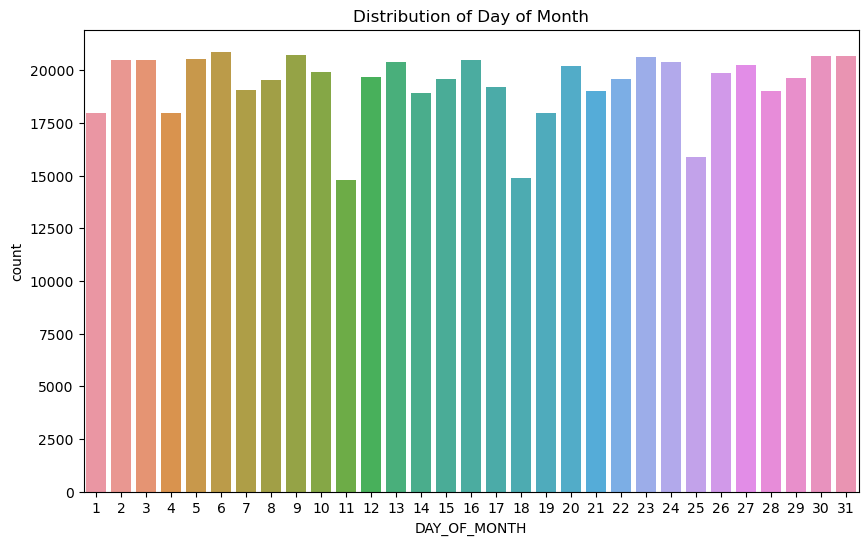

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DAY_OF_MONTH', data=df)
plt.title('Distribution of Day of Month')

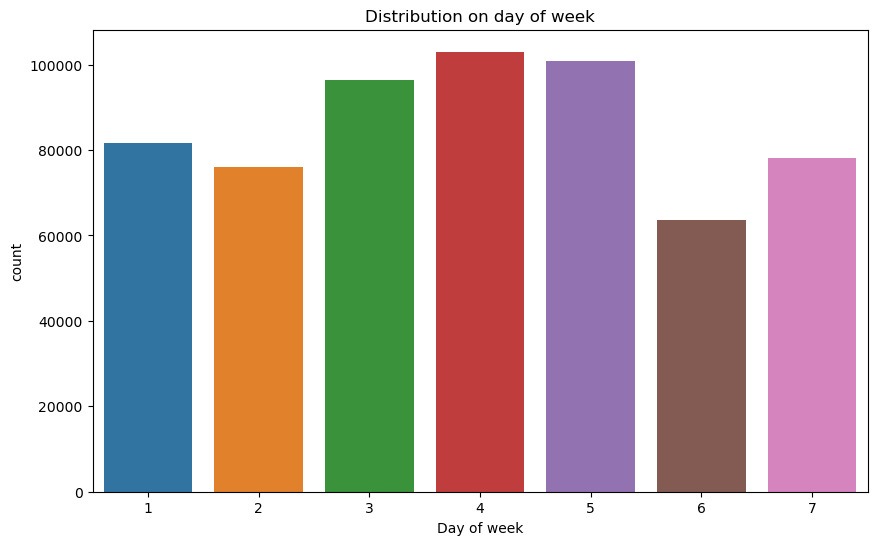

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(x='DAY_OF_WEEK', data=df)
plt.title('Distribution on day of week')
plt.xlabel('Day of week')
plt.show()

In [64]:
# Feature Engineering: Extract hour from 'DEP_TIME' and 'ARR_TIME'
df['DEP_HOUR'] = df['DEP_TIME'] // 100
df['ARR_TIME'] = df['ARR_TIME'] // 100

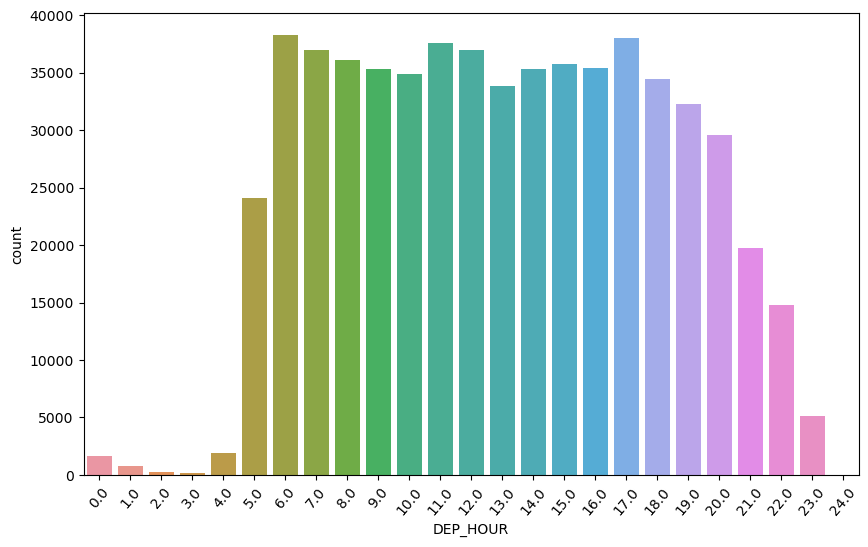

In [65]:
# visualize the distribution of Departure hour
plt.figure(figsize=(10,6))
sns.countplot(x='DEP_HOUR', data=df)
plt.xlabel('DEP_HOUR')
plt.xticks(rotation=50)
plt.show()

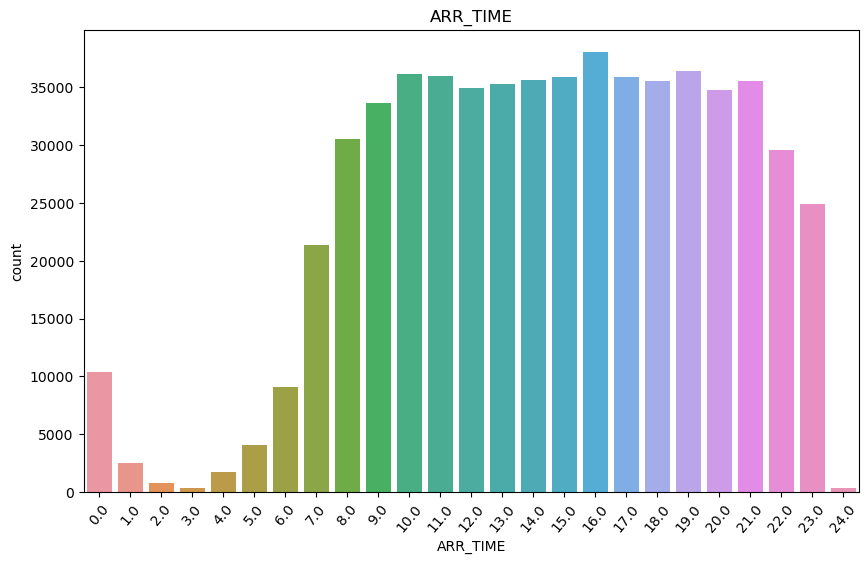

In [66]:
# visualise the distribution of Arrival time
plt.figure(figsize=(10,6))
sns.countplot(x='ARR_TIME', data=df)
plt.xlabel('ARR_TIME')
plt.xticks(rotation=50)
plt.title('ARR_TIME')
plt.show()

### Statistical analysis of the data

In [67]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DEP_HOUR
count,599268.000000,599268.000000,599268.000000,599268.000000,599268.000000,5.992680e+05,599268.000000,5.992680e+05,599268.000000,599268.000000,599268.000000,599268.000000,599268.0,599268.0,599268.000000,0.0,599268.000000
mean,16.024330,3.947341,19993.888087,2617.599331,12655.668577,1.265571e+06,12655.491822,1.265553e+06,1331.625553,0.135911,14.485082,0.137309,0.0,0.0,799.690689,NaN,13.009036
std,9.016028,1.912004,375.209441,1821.507116,1524.805258,1.524803e+05,1524.961114,1.524959e+05,497.052950,0.342694,5.253568,0.344174,0.0,0.0,588.344186,NaN,4.981969
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013506e+06,10135.000000,1.013506e+06,1.000000,0.000000,0.000000,0.000000,0.0,0.0,31.000000,NaN,0.000000
25%,8.000000,2.000000,19790.000000,1067.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,919.000000,0.000000,10.000000,0.000000,0.0,0.0,369.000000,NaN,9.000000
50%,16.000000,4.000000,19977.000000,2170.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1326.000000,0.000000,15.000000,0.000000,0.0,0.0,641.000000,NaN,13.000000
75%,24.000000,5.000000,20378.000000,4104.000000,14027.000000,1.402702e+06,14027.000000,1.402702e+06,1739.000000,0.000000,19.000000,0.000000,0.0,0.0,1041.000000,NaN,17.000000
max,31.000000,7.000000,20452.000000,6860.000000,16869.000000,1.686901e+06,16869.000000,1.686901e+06,2400.000000,1.000000,24.000000,1.000000,0.0,0.0,5095.000000,NaN,24.000000


In [68]:
# Frequency Distribution of categorical variables (e.g., 'OP_UNIQUE_CARRIER')
df['OP_UNIQUE_CARRIER'].value_counts()

WN    107708
DL     79928
AA     75472
OO     69501
UA     48019
YX     28826
MQ     25284
B6     24621
OH     23999
9E     22955
AS     20783
YV     17473
NK     17333
F9     12312
EV     10376
G4      7663
HA      7015
Name: OP_UNIQUE_CARRIER, dtype: int64

In [69]:
# correlation analysis
corr = df.corr()
corr

C:\Users\daksh\AppData\Local\Temp\ipykernel_14624\388118709.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DEP_HOUR
DAY_OF_MONTH,1.000000,-0.051972,-0.000404,-0.019476,-0.005212,-0.005212,-0.004994,-0.004994,-0.005035,-0.054768,0.008502,-0.050177,NaN,NaN,-0.020633,NaN,-0.005239
DAY_OF_WEEK,-0.051972,1.000000,0.005848,0.055838,0.004120,0.004120,0.003626,0.003626,0.006204,0.052789,-0.002630,0.056028,NaN,NaN,0.019967,NaN,0.006365
OP_CARRIER_AIRLINE_ID,-0.000404,0.005848,1.000000,0.423986,-0.046719,-0.046719,-0.046879,-0.046880,0.000560,0.031351,-0.011020,0.063539,NaN,NaN,-0.126025,NaN,0.000110
OP_CARRIER_FL_NUM,-0.019476,0.055838,0.423986,1.000000,-0.052596,-0.052596,-0.058479,-0.058480,0.004185,0.024529,0.011006,0.031619,NaN,NaN,-0.351568,NaN,0.004342
ORIGIN_AIRPORT_ID,-0.005212,0.004120,-0.046719,-0.052596,1.000000,1.000000,0.016678,0.016678,-0.029347,0.001822,-0.002766,0.007438,NaN,NaN,0.088134,NaN,-0.029220
ORIGIN_AIRPORT_SEQ_ID,-0.005212,0.004120,-0.046719,-0.052596,1.000000,1.000000,0.016678,0.016678,-0.029347,0.001822,-0.002765,0.007438,NaN,NaN,0.088135,NaN,-0.029219
DEST_AIRPORT_ID,-0.004994,0.003626,-0.046879,-0.058479,0.016678,0.016678,1.000000,1.000000,0.034907,0.006641,0.026247,0.005681,NaN,NaN,0.087847,NaN,0.034947
DEST_AIRPORT_SEQ_ID,-0.004994,0.003626,-0.046880,-0.058480,0.016678,0.016678,1.000000,1.000000,0.034907,0.006641,0.026246,0.005681,NaN,NaN,0.087847,NaN,0.034947
DEP_TIME,-0.005035,0.006204,0.000560,0.004185,-0.029347,-0.029347,0.034907,0.034907,1.000000,0.155023,0.667786,0.115073,NaN,NaN,-0.016014,NaN,0.999370
DEP_DEL15,-0.054768,0.052789,0.031351,0.024529,0.001822,0.001822,0.006641,0.006641,0.155023,1.000000,0.073453,0.711257,NaN,NaN,0.013318,NaN,0.155775


<Axes: >

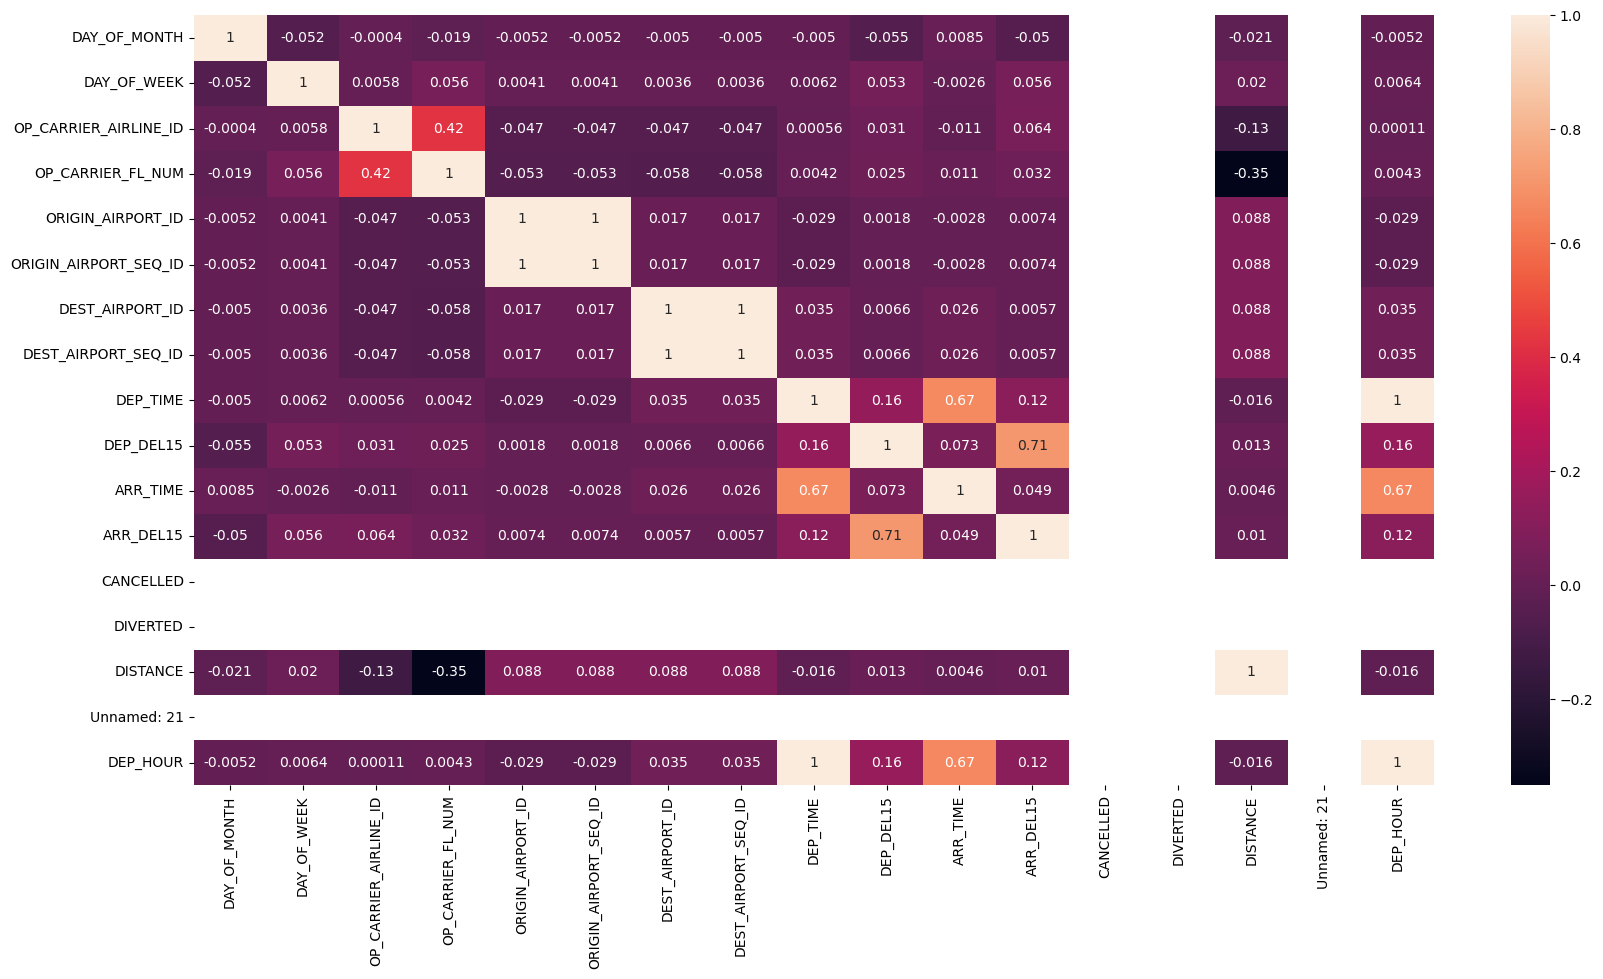

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

###  Encode the Datatype

In [71]:
# Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21,DEP_HOUR
0,0,2,5,8,5,2118,4391,239,239,238,...,594,0,5,11,0,0,0,72,0,10
1,0,2,5,8,5,471,4395,335,335,334,...,618,0,5,12,0,0,0,437,0,10
2,0,2,5,8,5,208,4398,110,110,110,...,1119,0,13,21,0,0,0,480,0,18
3,0,2,5,8,5,369,4399,50,50,50,...,1117,0,13,20,0,0,0,137,0,18
4,0,2,5,8,5,2617,4401,279,279,278,...,629,0,5,13,0,0,0,927,0,10


In [72]:
# Hypothesis Testing (e.g., t-test for comparing means of two groups)
import scipy.stats as stats
group1 = df[df['OP_UNIQUE_CARRIER'] == 'Carrier1']['DEP_DEL15']
group2 = df[df['OP_UNIQUE_CARRIER'] == 'Carrier2']['DEP_DEL15']
t_stat, p_value = stats.ttest_ind(group1, group2)
print("T-test for comparing means of DEP_DELAY between two carriers:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-test for comparing means of DEP_DELAY between two carriers:
T-statistic: nan
P-value: nan


In [79]:
# Probability Distributions (e.g., fit a normal distribution to 'DEP_DELAY')
dep_delay = df['DEP_DEL15'].dropna()
mu, sigma = stats.norm.fit(dep_delay)
print("Estimated parameters of normal distribution for DEP_DEL15:")
print("Mean (mu):", mu)
print("Standard Deviation (sigma):", sigma)


Estimated parameters of normal distribution for DEP_DEL15:
Mean (mu): 0.13591081118965137
Standard Deviation (sigma): 0.34269383214674626


### Building and Training the Model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split the data into Target and Feature variable
X = df.drop(['ARR_DEL15'], axis=1)
y = df['ARR_DEL15']

# Split the data into Training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit the Standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
# shape of the training and testing dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((479414, 22), (119854, 22), (479414,), (119854,))

In [77]:
# Evaluate the model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)


In [78]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
# predict the test set
y_pred = rfc.predict(X_test)

### Evaluation Metics

In [81]:
# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
print('Accuracy_score :', accuracy_score(y_test, y_pred))
print('Precision :',precision_score(y_test, y_pred, average='macro'))
print('recall :',recall_score(y_test, y_pred, average='macro'))
print('F1_score :', f1_score(y_test, y_pred, average='macro'))
print('Confusion_metrix :\n',confusion_matrix(y_test, y_pred))
print('Classification_report :\n',classification_report(y_test, y_pred))

Accuracy_score : 0.9356884209121097
Precision : 0.8751975037085593
recall : 0.8437388022236654
F1_score : 0.8584379276935863
Confusion_metrix :
 [[100342   3048]
 [  4660  11804]]
Classification_report :
               precision    recall  f1-score   support

           0       0.96      0.97      0.96    103390
           1       0.79      0.72      0.75     16464

    accuracy                           0.94    119854
   macro avg       0.88      0.84      0.86    119854
weighted avg       0.93      0.94      0.93    119854



### Hyperparameter tuning

In [82]:
from sklearn.model_selection import GridSearchCV

# define the hyperparameters to tune the model
param_grid = {'n_estimators': [50,100,150],
             'max_depth' : [None, 10,20],
             'min_samples_split': [2,5,10],
             'min_samples_leaf': [1,2,4]}

# initialize the model
model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    cv=5, 
                    scoring='accuracy',
                    verbose=2)

In [ ]:
grid.fit(X_train, y_train)
# get the best hyperparameters and model
best_parameter = grid.best_params_
best_model = grid.best_estimator_

# print the best hyperparameters
print(best_parameters)
print(best_model)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


### Results and Metrics

The model overall performance is very well. the performance with hight accuracy acore is 93.76 %, precison 96 %, recall 97 %, f1 score 96 %. 

Thank you !!!